# Sploosh: onomatopoeia of a mass falling into liquid




## Definition of the model

### Imports and definitions

In [1]:
import os
import sys
import math
sys.path.insert(1, "../..")
import numpy as np
import matplotlib.pyplot as plt

import spatialpy

### Model

In [128]:
class Sploosh(spatialpy.Model):
    WALLS = 1
    WATER = 2
    ROCK  = 3

    def __init__(self, model_name="Sploosh"):
        spatialpy.Model.__init__(self, model_name)
        
        # Domain       
        xmax=1
        ymax=1
        delta_wall=0.01
        delta_water=0.05
        delta_rock=0.01
        wall_mass=1.0
        wall_nu=1.0
        wall_vol=1.0
        water_mass=0.1
        water_nu=1.0
        water_vol=1.0
        rock_size=0.1
        rock_mass=10
        rock_nu=10
        rock_vol=1.0
        ############### start with and empty Domain
        domain = spatialpy.Domain(0, xlim=(0,xmax), ylim=(0,ymax), zlim=(0,0), gravity=[0,-1,0])
        domain.dimensions = 2
        ############### add Walls
        y=0 # bottom
        for x_ndx,x in enumerate(np.arange(start=0, stop=xmax, step=delta_wall)):
            domain.add_point([x,y,0], type=self.WALLS, mass=wall_mass, vol=wall_vol, nu=wall_nu, fixed=True)
        x=0 # left side
        for y_ndx,y in enumerate(np.arange(start=delta_wall, stop=ymax, step=delta_wall)):
            domain.add_point([x,y,0], type=self.WALLS, mass=wall_mass, vol=wall_vol, nu=wall_nu, fixed=True)
        x=xmax # right side
        for y_ndx,y in enumerate(np.arange(start=delta_wall, stop=ymax, step=delta_wall)):
            domain.add_point([x,y,0], type=self.WALLS, mass=wall_mass, vol=wall_vol, nu=wall_nu, fixed=True)
        ############### add Water
        for x_ndx,x in enumerate(np.arange(start=2*delta_water, stop=xmax-delta_water, step=delta_water)):
            for y_ndx,y in enumerate(np.arange(start=2*delta_water, stop=ymax/2, step=delta_water)):
                domain.add_point([x,y,0], type=self.WATER, mass=water_mass, vol=water_vol, nu=water_nu, fixed=False)
        ############### add a "Rock"
        #for x_ndx,x in enumerate(np.arange(start=(xmax/2)-(rock_size/2), stop=(xmax/2)+(rock_size/2), step=delta_rock)):
        #    for y_ndx,y in enumerate(np.arange(start=(ymax-rock_size), stop=ymax, step=delta_rock)):
        #        domain.add_point([x,y,0], type=self.ROCK, mass=rock_mass, vol=1.0, nu=rock_nu, fixed=False)

        self.add_domain(domain)
        
        # Static Domain
        self.staticDomain = False
        
        # Timespan
        dt = 1e-7
        nt = 20000
        self.timespan(np.linspace(0, dt*nt, 5), timestep_size=dt)
       

In [129]:
model = Sploosh()
#model.domain

In [130]:
solver = spatialpy.Solver(model=model, debug_level=0)
%time solver.compile()
solver.build_dir

CPU times: user 125 ms, sys: 3.99 ms, total: 129 ms
Wall time: 1.17 s


'/tmp/spatialpy_build_sfd2wx3d'

In [131]:
%time results = solver.run()

CPU times: user 6.42 ms, sys: 4.46 ms, total: 10.9 ms
Wall time: 1min 44s


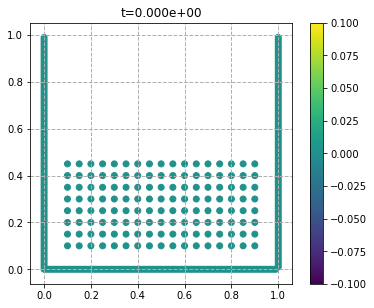

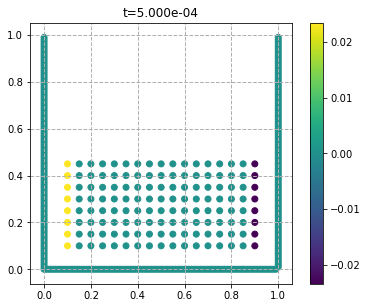

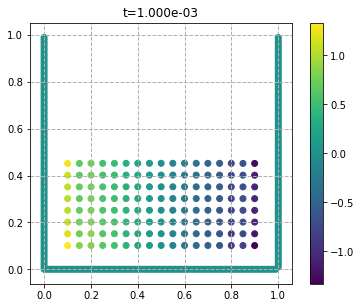

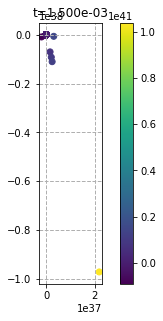

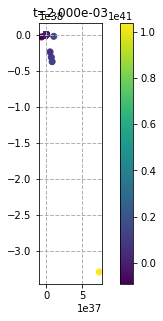

In [132]:
for n,t in enumerate(results.get_timespan()):
    results.plot_property("v",t_ndx=n,use_matplotlib=True)
    plt.title(f"t={t:.3e}")

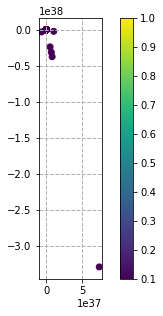

In [133]:
results.plot_property("mass", p_ndx=1, t_ndx=-1, use_matplotlib=True)

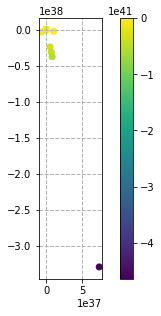

In [134]:
results.plot_property("v", p_ndx=1, t_ndx=-1, use_matplotlib=True)

In [127]:
#results.plot_property("v", p_ndx=1, t_ndx=-1, use_matplotlib=False)

In [118]:
#results.plot_property("type", use_matplotlib=True)